# Modified Transfer Learning Example to use Xception (larger image size)

In [3]:

import numpy as np
import PIL.Image as Image
import os
import matplotlib.pylab as plt
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications import Xception
import cv2
from sklearn.model_selection import train_test_split
print("import done")

import done


In [4]:
IMAGE_SHAPE = (299, 299) # (224,224) # 
INPUT_SHAPE = IMAGE_SHAPE + (3,)
# classifier = tf.keras.Sequential([
#     hub.KerasLayer("https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4", input_shape=IMAGE_SHAPE+(3,))
# ])
pretrained_model = Xception(input_shape=INPUT_SHAPE, weights = 'imagenet', include_top = True)
pretrained_model.summary()

2022-08-11 16:17:05.917568: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "xception"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 299, 299, 3  0           []                               
                                )]                                                                
                                                                                                  
 block1_conv1 (Conv2D)          (None, 149, 149, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 block1_conv1_bn (BatchNormaliz  (None, 149, 149, 32  128        ['block1_conv1[0][0]']           
 ation)                         )                                                          

array([[[[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.],
         ...,
         [1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]],

        [[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.],
         ...,
         [1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]],

        [[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.],
         ...,
         [1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]],

        ...,

        [[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.],
         ...,
         [1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]],

        [[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.],
         ...,
         [1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]],

        [[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.],
         ...,
         [1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]]]], dtype=float32)

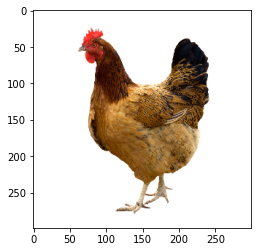

In [5]:
#gold_fish = Image.open("Hen.png").resize(IMAGE_SHAPE)
# KERAS wrapper for PIL image loading
test_image = keras.preprocessing.image.load_img("ImageNetSamples/hen.png",target_size=IMAGE_SHAPE)
test_image_arr=tf.keras.preprocessing.image.img_to_array(test_image)
input_arr = np.array([test_image_arr]) 
input_arr = input_arr/255.0
plt.imshow(test_image_arr/255.)
input_arr

In [92]:
#tf.keras.utils.image_dataset_from_directory("ImageNetSamples")

In [6]:
result = pretrained_model.predict(input_arr)
print(result.shape)
tf.keras.applications.xception.decode_predictions(result, top=5)
# print(dir(xception))

1/1 [==============================] - 2s 2s/step
(1, 1000)


[[('n01514859', 'hen', 0.9406476),
  ('n01514668', 'cock', 0.03477835),
  ('n01807496', 'partridge', 0.003932038),
  ('n01797886', 'ruffed_grouse', 0.0011657),
  ('n01798484', 'prairie_chicken', 0.0004891538)]]

In [7]:

file_path = tf.keras.utils.get_file('ImageNetLabels.txt','https://storage.googleapis.com/download.tensorflow.org/data/ImageNetLabels.txt')

In [20]:

image_labels = []
with open(file_path, "r") as f:
    image_labels = f.read().splitlines()
image_labels

['background',
 'tench',
 'goldfish',
 'great white shark',
 'tiger shark',
 'hammerhead',
 'electric ray',
 'stingray',
 'cock',
 'hen',
 'ostrich',
 'brambling',
 'goldfinch',
 'house finch',
 'junco',
 'indigo bunting',
 'robin',
 'bulbul',
 'jay',
 'magpie',
 'chickadee',
 'water ouzel',
 'kite',
 'bald eagle',
 'vulture',
 'great grey owl',
 'European fire salamander',
 'common newt',
 'eft',
 'spotted salamander',
 'axolotl',
 'bullfrog',
 'tree frog',
 'tailed frog',
 'loggerhead',
 'leatherback turtle',
 'mud turtle',
 'terrapin',
 'box turtle',
 'banded gecko',
 'common iguana',
 'American chameleon',
 'whiptail',
 'agama',
 'frilled lizard',
 'alligator lizard',
 'Gila monster',
 'green lizard',
 'African chameleon',
 'Komodo dragon',
 'African crocodile',
 'American alligator',
 'triceratops',
 'thunder snake',
 'ringneck snake',
 'hognose snake',
 'green snake',
 'king snake',
 'garter snake',
 'water snake',
 'vine snake',
 'night snake',
 'boa constrictor',
 'rock python'

In [11]:
image_labels[predicted_label_index]

'goldfish'

LOAD FLOWERS DATASET

In [8]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)
# cache_dir indicates where to download data. I specified . which means current directory
# untar true will unzip it

In [97]:
data_dir

'./datasets/flower_photos'

In [9]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

PosixPath('datasets/flower_photos')

In [99]:
list(data_dir.glob('*/*.jpg'))[:5]

[PosixPath('datasets/flower_photos/roses/16209331331_343c899d38.jpg'),
 PosixPath('datasets/flower_photos/roses/5777669976_a205f61e5b.jpg'),
 PosixPath('datasets/flower_photos/roses/4860145119_b1c3cbaa4e_n.jpg'),
 PosixPath('datasets/flower_photos/roses/15011625580_7974c44bce.jpg'),
 PosixPath('datasets/flower_photos/roses/17953368844_be3d18cf30_m.jpg')]

3670


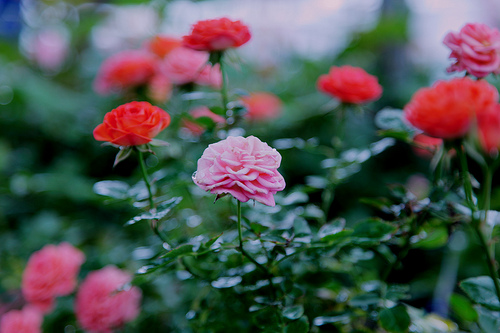

In [100]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)
roses = list(data_dir.glob('roses/*'))
roses[:5]
Image.open(str(roses[1]))

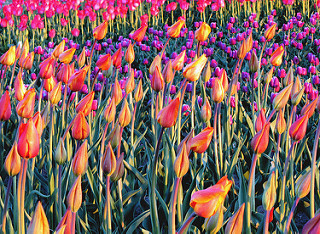

In [101]:

tulips = list(data_dir.glob('tulips/*'))
Image.open(str(tulips[0]))

Read flowers iages from disk into numpy array using opencv

In [10]:
flowers_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}
flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}
flowers_images_dict['roses'][:5]

[PosixPath('datasets/flower_photos/roses/16209331331_343c899d38.jpg'),
 PosixPath('datasets/flower_photos/roses/5777669976_a205f61e5b.jpg'),
 PosixPath('datasets/flower_photos/roses/4860145119_b1c3cbaa4e_n.jpg'),
 PosixPath('datasets/flower_photos/roses/15011625580_7974c44bce.jpg'),
 PosixPath('datasets/flower_photos/roses/17953368844_be3d18cf30_m.jpg')]

In [106]:
str(flowers_images_dict['roses'][0])

'datasets/flower_photos/roses/16209331331_343c899d38.jpg'

In [11]:
img = cv2.imread(str(flowers_images_dict['roses'][0]))
img.shape

(243, 500, 3)

In [12]:
cv2.resize(img,IMAGE_SHAPE).shape

(299, 299, 3)

In [13]:
X, y = [], []

for flower_name, images in flowers_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,IMAGE_SHAPE)
        X.append(resized_img)
        y.append(flowers_labels_dict[flower_name])

In [14]:
X = np.array(X)
y = np.array(y)

## Train Test Split

In [15]:
# train_test_split is from Scikit-learn
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

Preprocessing: scale images

In [16]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

Make predictions using pre-trained Model on new dataset (We expect a mismatch between images and predictions)

In [17]:
X[0].shape

(299, 299, 3)

In [18]:
IMAGE_SHAPE+(3,)

(299, 299, 3)

In [19]:
x0_resized = cv2.resize(X[0], IMAGE_SHAPE)
x1_resized = cv2.resize(X[1], IMAGE_SHAPE)
x2_resized = cv2.resize(X[2], IMAGE_SHAPE)

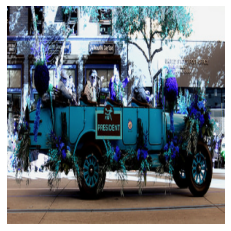

In [20]:
plt.axis('off')
plt.imshow(X[0])

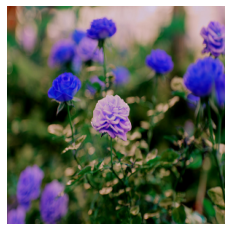

In [22]:
plt.axis('off')
plt.imshow(X[1])

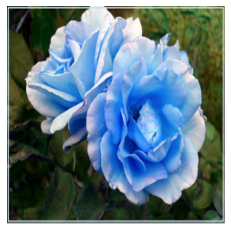

In [23]:
plt.axis('off')
plt.imshow(X[2])

In [21]:
## Here we use the ImageNet output layer with the flower input images.  Of course, the output will be nonsense.  We need to retrain the output layer with the new dataset
predicted = pretrained_model.predict(np.array([x0_resized, x1_resized, x2_resized]))
tf.keras.applications.xception.decode_predictions(predicted, top=5)


1/1 [==============================] - 3s 3s/step


[[('n03942813', 'ping-pong_ball', 0.9999018),
  ('n02971356', 'carton', 9.8265686e-05),
  ('n03763968', 'military_uniform', 3.9446075e-08),
  ('n03291819', 'envelope', 1.2957667e-08),
  ('n04461696', 'tow_truck', 5.5117083e-10)],
 [('n03775546', 'mixing_bowl', 0.99728584),
  ('n03942813', 'ping-pong_ball', 0.002665097),
  ('n04380533', 'table_lamp', 4.884797e-05),
  ('n02112350', 'keeshond', 1.4391685e-07),
  ('n03445777', 'golf_ball', 8.9275176e-08)],
 [('n02666196', 'abacus', 0.9793927),
  ('n04149813', 'scoreboard', 0.020601587),
  ('n04153751', 'screw', 3.958438e-06),
  ('n03983396', 'pop_bottle', 1.1543025e-06),
  ('n02027492', 'red-backed_sandpiper', 5.641223e-07)]]

Take pre-trained model and retrain it using flower images

In [31]:
#feature_extractor_model = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"
## The "top layer" refers to the very last layer that makes the prediction
# pretrained_model_without_top_layer = hub.KerasLayer(
#     feature_extractor_model, input_shape=IMAGE_SHAPE+(3,), trainable=False)
num_of_flowers = 5

base_model = Xception(input_shape=INPUT_SHAPE, weights = 'imagenet', include_top = False)
base_model.trainable = False
# model = tf.keras.Sequential([
#   pretrained_model_without_top_layer, ##Not trainable
#   tf.keras.layers.Dense(num_of_flowers) ##The output layer, will return one of 5 value for each of the flower types
# ])

inputs = keras.Input(shape=INPUT_SHAPE)
# We make sure that the base_model is running in inference mode here,
# by passing `training=False`. This is important for fine-tuning, as you will
# learn in a few paragraphs.
x = base_model(inputs, training=False)
# Convert features of shape `base_model.output_shape[1:]` to vectors
x = keras.layers.GlobalAveragePooling2D()(x)
# A Dense classifier with a single unit (binary classification)
outputs = keras.layers.Dense(num_of_flowers)(x)
model = keras.Model(inputs, outputs)

model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 299, 299, 3)]     0         
                                                                 
 xception (Functional)       (None, 10, 10, 2048)      20861480  
                                                                 
 global_average_pooling2d_2   (None, 2048)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_2 (Dense)             (None, 5)                 10245     
                                                                 
Total params: 20,871,725
Trainable params: 10,245
Non-trainable params: 20,861,480
_________________________________________________________________


In [37]:
## Retrain
# model.compile(
#   optimizer="adam",
#   loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
#   metrics=['acc'])
model.compile(optimizer=keras.optimizers.Adam(),
              loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=[keras.metrics.SparseCategoricalAccuracy()])


In [38]:
model.fit(X_train_scaled, y_train, epochs=2)

Epoch 1/2
86/86 [==============================] - 839s 9s/step - loss: 0.4555 - sparse_categorical_accuracy: 0.8536
Epoch 2/2
86/86 [==============================] - 877s 10s/step - loss: 0.3399 - sparse_categorical_accuracy: 0.8928


In [28]:
model.evaluate(X_test_scaled,y_test)

14/29 [=============>................] - ETA: 2:29 - loss: 1.7080 - binary_accuracy: 0.2107

KeyboardInterrupt: 